<a href="https://colab.research.google.com/github/Anuksha-Dutta/Mentorness/blob/main/Project_2_Fastag_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA EXPLORATION

In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/FastagFraudDetection.csv')
print('Dataset loaded successfully')

Dataset loaded successfully


In [2]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.05981

In [3]:

# Check the dimensions of the dataset (number of rows and columns)
print("\nDimensions of the dataset:")
print(data.shape)




Dimensions of the dataset:
(5000, 13)


In [4]:

# Summary statistics of numerical columns
print("\nSummary statistics:")
print(data.describe())



Summary statistics:
       Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.000000      82.000000
max       5000.000000           350.00000   350.000000     118.000000


In [5]:

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())



Missing values:
Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


In [6]:

# Data types of columns
print("\nData types:")
print(data.dtypes)



Data types:
Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object



Unique values in categorical columns:
Timestamp: ['1/6/2023 11:20' '1/7/2023 14:55' '1/8/2023 18:25' ... '2/5/2023 5:08'
 '2/20/2023 20:34' '3/10/2023 0:59']
Vehicle_Type: ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
FastagID: ['FTG-001-ABC-121' 'FTG-002-XYZ-451' nan ... 'FTG-447-PLN-109'
 'FTG-458-VFR-876' 'FTG-459-WSX-543']
TollBoothID: ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Lane_Type: ['Express' 'Regular']
Vehicle_Dimensions: ['Large' 'Small' 'Medium']
Geographical_Location: ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']
Vehicle_Plate_Number: ['KA11AB1234' 'KA66CD5678' 'KA88EF9012' ... 'KA33WX6789' 'KA35YZ0123'
 'KA37AB3456']
Fraud_indicator: ['Fraud' 'Not Fraud']


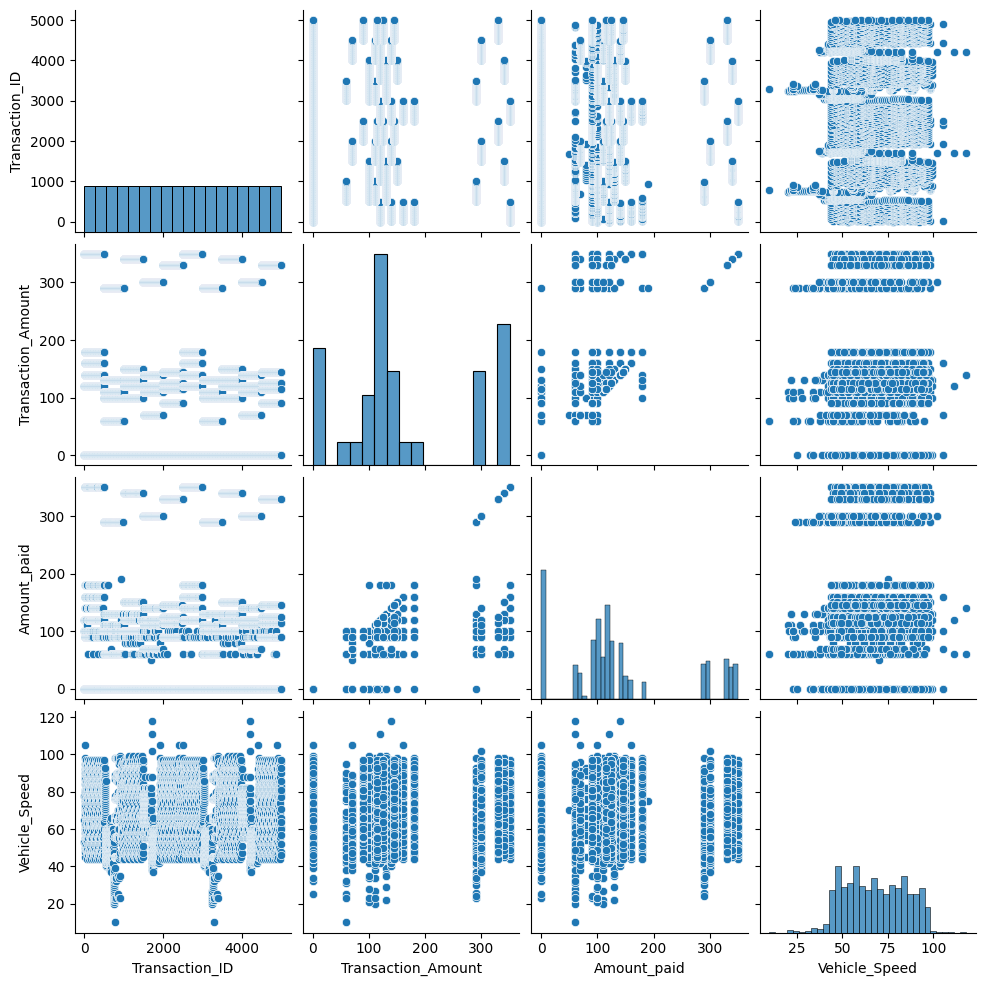

In [7]:

# Unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].unique()}")

# Visualize distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)
plt.show()

# FEATURE ENGINEERING

In [10]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
fastag_data = pd.read_csv('/content/FastagFraudDetection.csv')

# Feature engineering

# Convert Timestamp to datetime
fastag_data['Timestamp'] = pd.to_datetime(fastag_data['Timestamp'])

# Extract date and time features
fastag_data['Day'] = fastag_data['Timestamp'].dt.day
fastag_data['Month'] = fastag_data['Timestamp'].dt.month
fastag_data['Year'] = fastag_data['Timestamp'].dt.year
fastag_data['Hour'] = fastag_data['Timestamp'].dt.hour
fastag_data['Minute'] = fastag_data['Timestamp'].dt.minute

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
fastag_data['Vehicle_Type'] = label_encoder.fit_transform(fastag_data['Vehicle_Type'])
fastag_data['Lane_Type'] = label_encoder.fit_transform(fastag_data['Lane_Type'])
fastag_data['Geographical_Location'] = label_encoder.fit_transform(fastag_data['Geographical_Location'])

# Extract features from Vehicle_Plate_Number
# For example, extracting the state code or vehicle category

# Drop unnecessary columns
fastag_data.drop(['Transaction_ID', 'Timestamp', 'FastagID', 'TollBoothID', 'Vehicle_Dimensions', 'Vehicle_Plate_Number'], axis=1, inplace=True)

# Save the engineered dataset
fastag_data.to_csv('engineered_fastag_data.csv', index=False)


# MODEL DEVELOPMENT

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Split the dataset into features (X) and target variable (y)
X = fastag_data.drop('Fraud_indicator', axis=1)
y = fastag_data['Fraud_indicator']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.982
Confusion Matrix:
 [[199  18]
 [  0 783]]
Classification Report:
               precision    recall  f1-score   support

       Fraud       1.00      0.92      0.96       217
   Not Fraud       0.98      1.00      0.99       783

    accuracy                           0.98      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.98      0.98      0.98      1000



# REAL TIME FRAUD DETECTION

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib
import time

# Load the historical dataset
historical_data = pd.read_csv('/content/engineered_fastag_data.csv')

# Feature engineering (if necessary)

# Separate features and target variable
X = historical_data.drop('Fraud_indicator', axis=1)
y = historical_data['Fraud_indicator']

# Initialize the model
model = RandomForestClassifier()

# Train the model on historical data
model.fit(X, y)

# Save the trained model
joblib.dump(model, 'fastag_fraud_detection_model.pkl')

# Simulate real-time data arrival
while True:
    # Get new data (replace this with code to receive real-time data)
    new_data = pd.read_csv('/content/engineered_fastag_data.csv')

    # Separate features from the new data
    X_new = new_data.drop('Fraud_indicator', axis=1)

    # Predict fraud for the new data
    fraud_predictions = model.predict(X_new)

    # Print the predictions (or take further action)
    print("New data processed. Predicted fraud status:", fraud_predictions)

    # Wait for a specified time interval before processing next batch of data
    time.sleep(60)  # wait for 1 minute


New data processed. Predicted fraud status: ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud status: ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud status: ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud status: ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud status: ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud status: ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud status: ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud status: ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud status: ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data p

KeyboardInterrupt: 

# EXPLANATORY ANALYSIS

First few rows of the dataset:
   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.05981

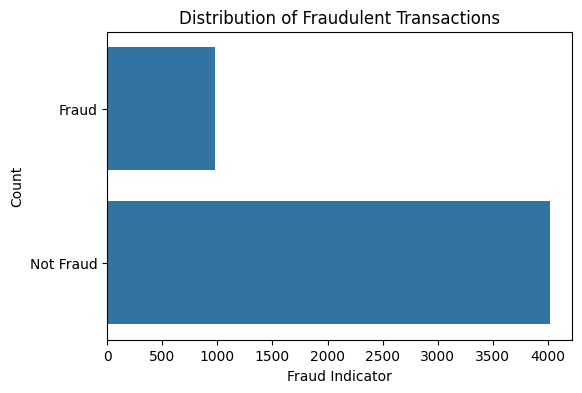

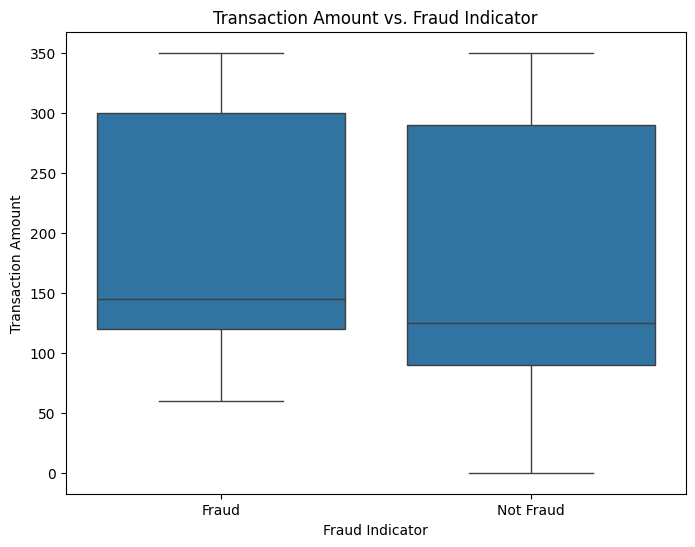

<ipython-input-21-76a92e1261d4>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


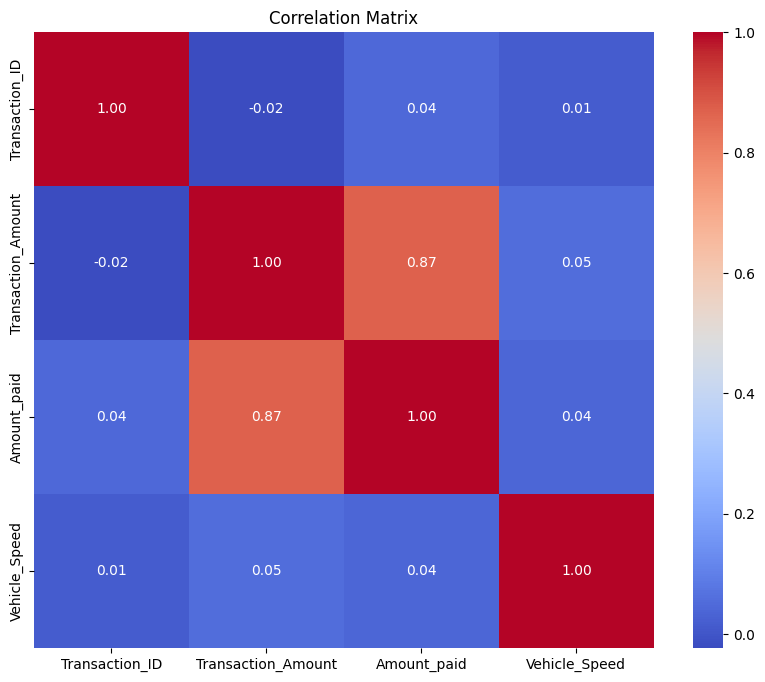

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/content/FastagFraudDetection.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Visualize the distribution of the target variable (Fraud_indicator)
plt.figure(figsize=(6, 4))
sns.countplot(data['Fraud_indicator'])
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between Transaction_Amount and Fraud_indicator
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=data)
plt.title('Transaction Amount vs. Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Transaction Amount')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
